<center><h1> ADMN5006 Financial Analytics </h1>
<h2> Assignment 2: Stock Investment Simulation


<center><b> Group Members: </b> Eyas Abu Elhouf, Katrina Ong, Melvin Cheriyan, Pranav Gujar, Bista Bijo, Praveen Kumar <br><br>
<b>Code Written by: </b> Katrina Ong


---

### Table of Contents
1. Import Libraries
2. Collate Initial List of Stocks
3. Recommendations by Investment Analysts
4. Historical Performance
5. Financial Ratios
6. Portfolio Assessment
7. Conclusion

---

### 1. Import Libraries

In [1]:
#Standard Libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2)

%matplotlib inline

In [2]:
#Financial Analytics Packages
import plotly.express as px
import cufflinks as cf
import yfinance as yf
import chart_studio
import finquant
from finquant.portfolio import build_portfolio

In [3]:
#Web Scraping to extract fundamental ratios
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [4]:
#Monte Carlo Simulation
import pandas_montecarlo

---

### 2. Collate Initial List of Stocks

In [5]:
top500_tickers = ['AAPL', #apple
                  'MSFT', #microsoft
                  'TSLA', #tesla
                  'GOOGL', #google class a
                  'GOOG', #google class b
                  'UNH', #universal health
                  'JNJ', #j&j
                  'XOM'] #exxon 
#provided by Praveen

In [6]:
highgrowth_tickers = ['OXY', #occidental petroleum
                      'SMCI', #super micro computer
                      'ENPH', #enphase energy
                      'GSAT', #global star
                      'STLD', #steel dynamics
                      'FSLR'] #first solar
#provided by Praveen

In [7]:
personalpicks_tickers = ['WMT', #Walmart
                        'COST', #Costco
                        'TGT', #Target
                        'PG', #P&G
                        'PFE', #Pfizer
                        'AMZN', #Amazon
                        'ETSY', #Etsy
                        'WBA', #Walgreens
                        'NEE']  #Next Era Energy

#selected based on industry and personal qualitative view of company performance

In [8]:
tickers = top500_tickers + highgrowth_tickers + personalpicks_tickers

In [9]:
tickers

['AAPL',
 'MSFT',
 'TSLA',
 'GOOGL',
 'GOOG',
 'UNH',
 'JNJ',
 'XOM',
 'OXY',
 'SMCI',
 'ENPH',
 'GSAT',
 'STLD',
 'FSLR',
 'WMT',
 'COST',
 'TGT',
 'PG',
 'PFE',
 'AMZN',
 'ETSY',
 'WBA',
 'NEE']

In [10]:
#Create a dictionary of YFinance Tickers
def CreateYFDict(lst):
    d = {}
    for item in range(0,len(lst)):
        d[lst[item]] = yf.Ticker(lst[item])
    return d

In [11]:
d_ticker = CreateYFDict(tickers)

In [12]:
d_ticker

{'AAPL': yfinance.Ticker object <AAPL>,
 'MSFT': yfinance.Ticker object <MSFT>,
 'TSLA': yfinance.Ticker object <TSLA>,
 'GOOGL': yfinance.Ticker object <GOOGL>,
 'GOOG': yfinance.Ticker object <GOOG>,
 'UNH': yfinance.Ticker object <UNH>,
 'JNJ': yfinance.Ticker object <JNJ>,
 'XOM': yfinance.Ticker object <XOM>,
 'OXY': yfinance.Ticker object <OXY>,
 'SMCI': yfinance.Ticker object <SMCI>,
 'ENPH': yfinance.Ticker object <ENPH>,
 'GSAT': yfinance.Ticker object <GSAT>,
 'STLD': yfinance.Ticker object <STLD>,
 'FSLR': yfinance.Ticker object <FSLR>,
 'WMT': yfinance.Ticker object <WMT>,
 'COST': yfinance.Ticker object <COST>,
 'TGT': yfinance.Ticker object <TGT>,
 'PG': yfinance.Ticker object <PG>,
 'PFE': yfinance.Ticker object <PFE>,
 'AMZN': yfinance.Ticker object <AMZN>,
 'ETSY': yfinance.Ticker object <ETSY>,
 'WBA': yfinance.Ticker object <WBA>,
 'NEE': yfinance.Ticker object <NEE>}

---

### 3. Recommendations by Investment Analysts

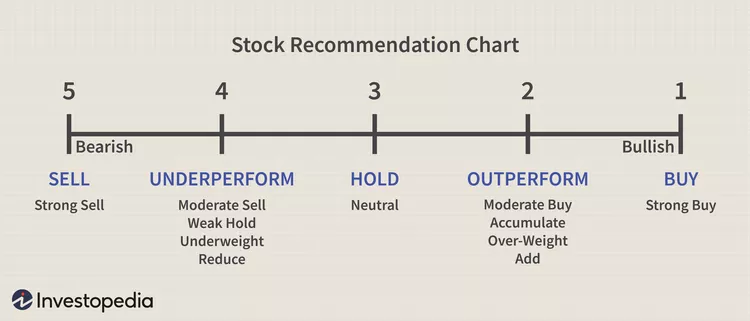

In [13]:
#Create a function to check all yahoo finance recommendations from dictionary of stocks
def check_recommendations(ticker_dict,ticker_list):
    for i in range(0,len(ticker_dict)):
        df_rec = ticker_dict[ticker_list[i]].recommendations #getting recommendations by investment firms
        if df_rec is None: 
            pass 
        else:
            df_rec = df_rec.loc['2022-11-01':'2022-11-24'] # filtering to Oct/November 2022 recommendations
            if df_rec.shape[0] > 0:
                print(ticker_list[i]) #print ticker
                print(df_rec['To Grade'].value_counts()) # print Summary of recommendations
                print('\n')
                print(df_rec) #print dataframe of recommendations (to see names of investment firms and date of recommendation)
                print('--------\n')

In [14]:
check_recommendations(d_ticker,tickers)

AAPL
Equal-Weight    1
Buy             1
Neutral         1
Overweight      1
Name: To Grade, dtype: int64


                                  Firm      To Grade From Grade Action
Date                                                                  
2022-11-07 12:39:27           Barclays  Equal-Weight              main
2022-11-07 13:08:30  B of A Securities       Neutral              main
2022-11-08 12:14:23     Morgan Stanley    Overweight              main
2022-11-08 12:17:03                UBS           Buy              main
--------

MSFT
Neutral    1
Name: To Grade, dtype: int64


                          Firm To Grade From Grade Action
Date                                                     
2022-11-02 10:29:21  Macquarie  Neutral              init
--------

TSLA
Neutral    1
Name: To Grade, dtype: int64


                          Firm To Grade From Grade Action
Date                                                     
2022-11-23 11:21:03  Citigroup  Neutral       Sell     up


AMZN
Overweight    1
Neutral       1
Buy           1
Outperform    1
Name: To Grade, dtype: int64


                                  Firm    To Grade From Grade Action
Date                                                                
2022-11-02 17:23:28  Tigress Financial         Buy              main
2022-11-14 11:58:40         Rosenblatt     Neutral              main
2022-11-15 12:46:44   MoffettNathanson  Outperform              init
2022-11-22 11:14:29      Piper Sandler  Overweight              main
--------



Based on recommendations by investment analysts in November 2022, buys include:
- P&G
- Target
- Walmart
- First Solar
- Enphase Energy
- Exxon
- Universal Health
- Google
- Apple
- Amazon

In [15]:
#limiting analysis to recommended stocks
recommended_tickers = ['TGT', #Target
                      'PG', #P&G
                      'WMT', #Walmart
                      'FSLR', #first solar                      
                      'ENPH', #enphase energy
                      'XOM', #exxon
                      'UNH', #universal health
                      'GOOGL', #google
                      'AAPL', #apple
                      'AMZN'] #amazon

---

### 4. Historical Performance

In [16]:
#downloading closing price for past 10 years
recommended_stocks_5y = yf.download(recommended_tickers, period = '10y').Close

[*********************100%***********************]  10 of 10 completed


In [17]:
#downloading closing price for past 5 years
recommended_stocks_5y = yf.download(recommended_tickers, period = '5y').Close

[*********************100%***********************]  10 of 10 completed


In [18]:
#downloading closing price for past year
recommended_stocks_1y = yf.download(recommended_tickers, period = '1y').Close

[*********************100%***********************]  10 of 10 completed


In [19]:
cf.go_offline()

In [20]:
recommended_stocks_5y.iplot(title = '5 Year Historical Performance');

In [21]:
recommended_stocks_1y.iplot(title = '1 Year Historical Performance');

In [22]:
#Normalizing Stock Price to compare performance
norm_recommendedstocks_5y = recommended_stocks_5y.div(recommended_stocks_5y.iloc[0,:]).mul(100)
norm_recommendedstocks_1y = recommended_stocks_1y.div(recommended_stocks_1y.iloc[0,:]).mul(100)

In [23]:
norm_recommendedstocks_5y.iplot(title = 'Normalized 5-Year Performance',yTitle = 'Normalized Price')

In [24]:
norm_recommendedstocks_1y.iplot(title = 'Normalized 1-Year Performance',yTitle = 'Normalized Price')

---

### 5. Financial Ratios

We will focus on a handful of financial ratios to evaluate our stock picks, including:
- Return on Equity (ROE)
- Earnings per Share (EPS)
- Price-to-Book (P/B)
- Price-to-Earnings (P/E)
- Quick Ratio
- Current Ratio
- Debt-to-Equity Ratio

APIs provide outdated Financial Ratio information, so an alternative was found to provide updated ratios. (Sources: [[a]](https://medium.datadriveninvestor.com/get-up-to-date-financial-ratios-p-e-p-b-and-more-of-stocks-using-python-4b53dd82908f), [[b]](https://github.com/damianboh/get_fundamental_ratios))

#### 5.1 Functions to Web Scrape Financial Ratios

In [25]:
def fundamental_metric(soup, metric):
    return soup.find(text = metric).find_next(class_='snapshot-td2').text

In [26]:
def get_fundamental_data(df):
    for symbol in df.index:
        try:
            url = ("http://finviz.com/quote.ashx?t=" + symbol.lower())
            req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
            response = urlopen(req)
            soup = BeautifulSoup(response)
            for m in df.columns:                
                df.loc[symbol,m] = fundamental_metric(soup,m)                
        except Exception as e:
            print (symbol, 'not found')
    return df

#### 5.2 List of Financial Ratios to Scrape

In [27]:
metric = ['ROE',
          'EPS (ttm)',
          'P/B',
          'P/E',
          'Quick Ratio',
          'Current Ratio',
          'Debt/Eq']

"""
- Return on Equity (ROE)
- Earnings per Share (EPS)
- Price-to-Book (P/B
- Price-to-Earnings (P/E)
- Quick Ratio
- Current Ratio
- Debt-to-Equity Ratio
""";

#### 5.3 Create Dataframe

In [28]:
df = pd.DataFrame(index=recommended_tickers,columns=metric)
df = get_fundamental_data(df)
df.head(2)

ROE EPS (ttm)   P/B    P/E Quick Ratio Current Ratio Debt/Eq
TGT  30.50%      7.30  6.48  21.23        0.10          0.90    1.49
PG   32.20%      5.77  8.23  25.88        0.40          0.60    0.76

In [29]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, TGT to AMZN
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ROE            10 non-null     object
 1   EPS (ttm)      10 non-null     object
 2   P/B            10 non-null     object
 3   P/E            10 non-null     object
 4   Quick Ratio    10 non-null     object
 5   Current Ratio  10 non-null     object
 6   Debt/Eq        10 non-null     object
dtypes: object(7)
memory usage: 960.0+ bytes


In [30]:
#Parse Data into Numeric Types
df['ROE'] = df['ROE'].str.replace('%', '')
df = df.apply(pd.to_numeric, errors='coerce')

In [31]:
#Check if dataype is corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, TGT to AMZN
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROE            10 non-null     float64
 1   EPS (ttm)      10 non-null     float64
 2   P/B            10 non-null     float64
 3   P/E            10 non-null     float64
 4   Quick Ratio    9 non-null      float64
 5   Current Ratio  9 non-null      float64
 6   Debt/Eq        10 non-null     float64
dtypes: float64(7)
memory usage: 960.0+ bytes


In [32]:
df

ROE  EPS (ttm)     P/B      P/E  Quick Ratio  Current Ratio  \
TGT    30.5000     7.3000  6.4800  21.2300       0.1000         0.9000   
PG     32.2000     5.7700  8.2300  25.8800       0.4000         0.6000   
WMT    11.6000     3.2400  5.6200  46.3200       0.2000         0.9000   
FSLR    1.6000     0.8800  2.8800 178.7400       3.1000         4.1000   
ENPH   65.0000     2.0500 68.8300 151.0900       3.3000         3.6000   
XOM    29.6000    12.2600  2.3400   8.4700       1.0000         1.3000   
UNH    26.6000    20.4100  6.7600  26.4200          nan            nan   
GOOGL  26.4000     4.9400  4.9800  19.6300       2.5000         2.5000   
AAPL  160.9000     6.1000 45.2200  23.4200       0.8000         0.9000   
AMZN    8.4000     1.0800  6.5400  81.4100       0.7000         0.9000   

       Debt/Eq  
TGT     1.4900  
PG      0.7600  
WMT     0.7100  
FSLR    0.0400  
ENPH    2.1100  
XOM     0.2400  
UNH     0.6500  
GOOGL   0.0600  
AAPL    2.3700  
AMZN    0.5900

#### 5.4 Filter Stocks

Although financial ratios are best compared to industry performance, this quick filtering can help further narrow down our stock picks.

In [33]:
#Companies with High ROE 
df['ROE'].nlargest(n=6)

AAPL   160.9000
ENPH    65.0000
PG      32.2000
TGT     30.5000
XOM     29.6000
UNH     26.6000
Name: ROE, dtype: float64

In [34]:
#Companies with High EPS
df['EPS (ttm)'].nlargest(n=6)

UNH     20.4100
XOM     12.2600
TGT      7.3000
AAPL     6.1000
PG       5.7700
GOOGL    4.9400
Name: EPS (ttm), dtype: float64

In [35]:
#Companies with the Lowest valuations (P/B)
df['P/B'].nsmallest(n=6)

XOM     2.3400
FSLR    2.8800
GOOGL   4.9800
WMT     5.6200
TGT     6.4800
AMZN    6.5400
Name: P/B, dtype: float64

In [36]:
#Companies with Lowest Valuations (P/E)
df['P/E'].nsmallest(n=6)

XOM      8.4700
GOOGL   19.6300
TGT     21.2300
AAPL    23.4200
PG      25.8800
UNH     26.4200
Name: P/E, dtype: float64

In [37]:
#Quick Ratio >= 1 
#Enough liquid assets to meet short-term obligations 
df[df['Quick Ratio']>=1]

ROE  EPS (ttm)     P/B      P/E  Quick Ratio  Current Ratio  Debt/Eq
FSLR   1.6000     0.8800  2.8800 178.7400       3.1000         4.1000   0.0400
ENPH  65.0000     2.0500 68.8300 151.0900       3.3000         3.6000   2.1100
XOM   29.6000    12.2600  2.3400   8.4700       1.0000         1.3000   0.2400
GOOGL 26.4000     4.9400  4.9800  19.6300       2.5000         2.5000   0.0600

In [38]:
# Current Ratio >= 1.2 
# Companies have at least 20% more in current assets to cover its short term debt
df[df['Current Ratio']>=1.2]

ROE  EPS (ttm)     P/B      P/E  Quick Ratio  Current Ratio  Debt/Eq
FSLR   1.6000     0.8800  2.8800 178.7400       3.1000         4.1000   0.0400
ENPH  65.0000     2.0500 68.8300 151.0900       3.3000         3.6000   2.1100
XOM   29.6000    12.2600  2.3400   8.4700       1.0000         1.3000   0.2400
GOOGL 26.4000     4.9400  4.9800  19.6300       2.5000         2.5000   0.0600

In [39]:
# Companies with Low Debt-to-Equity (below 1.5 or 60:40)
# Companies that are not highly leveraged in debt, to avoid risk
df[df['Debt/Eq'] <= 1.5]

ROE  EPS (ttm)    P/B      P/E  Quick Ratio  Current Ratio  Debt/Eq
TGT   30.5000     7.3000 6.4800  21.2300       0.1000         0.9000   1.4900
PG    32.2000     5.7700 8.2300  25.8800       0.4000         0.6000   0.7600
WMT   11.6000     3.2400 5.6200  46.3200       0.2000         0.9000   0.7100
FSLR   1.6000     0.8800 2.8800 178.7400       3.1000         4.1000   0.0400
XOM   29.6000    12.2600 2.3400   8.4700       1.0000         1.3000   0.2400
UNH   26.6000    20.4100 6.7600  26.4200          nan            nan   0.6500
GOOGL 26.4000     4.9400 4.9800  19.6300       2.5000         2.5000   0.0600
AMZN   8.4000     1.0800 6.5400  81.4100       0.7000         0.9000   0.5900

Proposed Stock Picks are further filtered, based on a rough estimate of their overall performance in basic financial ratios:
- XOM (Natural Gas)
- FSLR (Renewable Energy)
- ENPH (Renewable Energy)
- PG (Consumer Staples/ Personal Care)
- UNH (Healthcare)
- GOOGL (Technology)

In [40]:
recommended_tickers2 = ['PG', #P&G
                      'FSLR', #first solar                      
                      'ENPH', #enphase energy
                      'XOM', #exxon
                      'UNH', #universal health
                      'GOOGL'] #google

Consider replacing Google with Walmart, for a defensive industry.

In [41]:
recommended_tickers2.remove('GOOGL')
recommended_tickers2.append('WMT')

In [42]:
final_tickers = recommended_tickers2.copy()

In [43]:
final_tickers

['PG', 'FSLR', 'ENPH', 'XOM', 'UNH', 'WMT']

**Final Portfolio List:**

| Ticker | Company          | Industry    |
| :------: |:-----------------|:----------- |
| XOM    | Exxon Mobil Corp | Natural Gas |
| FSLR   | First Solar, Inc.| Renewable Energy |
| ENPH | Enphase Energy | Renewable Energy |
| PG | Proctor & Gamble Co. | Consumer Staples/ Personal Care |
| UNH | UnitedHealth Group Inc. | Healthcare |
| WMT | Walmart, Inc. | Consumer Staples/ Food Retail  |

---

### 6. Portfolio Assessment

#### 6.1 Stock Properties

In [44]:
d_finaltickers = CreateYFDict(final_tickers)
d_finaltickers

{'PG': yfinance.Ticker object <PG>,
 'FSLR': yfinance.Ticker object <FSLR>,
 'ENPH': yfinance.Ticker object <ENPH>,
 'XOM': yfinance.Ticker object <XOM>,
 'UNH': yfinance.Ticker object <UNH>,
 'WMT': yfinance.Ticker object <WMT>}

In [45]:
d_finaltickers['PG'].info

{'zip': '45202',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 106000,
 'longBusinessSummary': 'The Procter & Gamble Company provides branded consumer packaged goods worldwide. It operates through five segments: Beauty; Grooming; Health Care; Fabric & Home Care; and Baby, Feminine & Family Care. The Beauty segment offers conditioners, shampoos, styling aids, and treatments under the Head & Shoulders, Herbal Essences, Pantene, and Rejoice brands; and antiperspirants and deodorants, personal cleansing, and skin care products under the Olay, Old Spice, Safeguard, Secret, and SK-II brands. The Grooming segment provides shave care products and appliances under the Braun, Gillette, and Venus brand names. The Health Care segment offers toothbrushes, toothpastes, and other oral care products under the Crest and Oral-B brand names; and gastrointestinal, rapid diagnostics, respiratory, vitamins/minerals/supplements, pain relief, and other personal health care products under the Metamuci

In [46]:
def PrintStockInfo(d_stocks, selectedinfo = 0):
    d_stockinfo = {}

    for key in d_stocks:
        d_stockinfo[key] = d_stocks[key].info
    
    if selectedinfo == 0:
        print('Please input selected info.')
    else:
        df_stockinfo = pd.DataFrame(index = d_stocks.keys(),columns = selectedinfo)
        for key in d_stocks:
            print(key)
            for i in selectedinfo:
                df_stockinfo.at[key,i] = d_stockinfo[key][i]
                print(f'{i}: {d_stockinfo[key][i]} | ')
            print('----------\n')                
    
    return df_stockinfo

In [47]:
info_needed = ['sector','longBusinessSummary','currentPrice','currentRatio','debtToEquity','returnOnEquity','quickRatio','forwardEps','trailingEps','priceToBook','dividendYield','regularMarketPrice']
df_stockinfo = PrintStockInfo(d_finaltickers,info_needed);

PG
sector: Consumer Defensive | 
longBusinessSummary: The Procter & Gamble Company provides branded consumer packaged goods worldwide. It operates through five segments: Beauty; Grooming; Health Care; Fabric & Home Care; and Baby, Feminine & Family Care. The Beauty segment offers conditioners, shampoos, styling aids, and treatments under the Head & Shoulders, Herbal Essences, Pantene, and Rejoice brands; and antiperspirants and deodorants, personal cleansing, and skin care products under the Olay, Old Spice, Safeguard, Secret, and SK-II brands. The Grooming segment provides shave care products and appliances under the Braun, Gillette, and Venus brand names. The Health Care segment offers toothbrushes, toothpastes, and other oral care products under the Crest and Oral-B brand names; and gastrointestinal, rapid diagnostics, respiratory, vitamins/minerals/supplements, pain relief, and other personal health care products under the Metamucil, Neurobion, Pepto-Bismol, and Vicks brands. The F

In [48]:
df_stockinfo

sector                                longBusinessSummary  \
PG    Consumer Defensive  The Procter & Gamble Company provides branded ...   
FSLR          Technology  First Solar, Inc. provides photovoltaic (PV) s...   
ENPH          Technology  Enphase Energy, Inc., together with its subsid...   
XOM               Energy  Exxon Mobil Corporation explores for and produ...   
UNH           Healthcare  UnitedHealth Group Incorporated operates as a ...   
WMT   Consumer Defensive  Walmart Inc. engages in the operation of retai...   

     currentPrice currentRatio debtToEquity returnOnEquity quickRatio  \
PG       149.2800       0.6150      74.4420         0.3224     0.3390   
FSLR     157.4700       4.2110       3.9410         0.0324     2.9060   
ENPH     309.7300       3.6030     214.6420         0.4710     3.2970   
XOM      103.8800       1.1630      25.4100         0.2305     0.8350   
UNH      539.3200       0.8220      58.6910         0.2529     0.5900   
WMT      149.8900       0.8420      78.2880         0.1620     0.2150   

     forwardEps trailingEps priceToBook dividendYield regularMarketPrice  
PG       5.9600      5.4390      7.9931        0.0279           149.2800  
FSLR     3.2700      4.8400      2.9397          None           157.4700  
ENPH     2.7000      0.6730     57.3468          None           309.7300  
XOM      4.1900     -4.4710      2.7981        0.0332           103.8800  
UNH     21.3700     17.5880      7.4464        0.0122           539.3200  
WMT      5.8500      4.7500      5.2250        0.0160           149.8900

#### 6.2 Rate of Return

In [49]:
df_portfolio = yf.download(final_tickers,period = '10y')
df_portfolio.head()

[*********************100%***********************]  6 of 6 completed


Adj Close                                          Close          \
                ENPH    FSLR      PG     UNH     WMT     XOM   ENPH    FSLR   
Date                                                                          
2012-12-07       nan     nan     nan     nan     nan     nan    nan     nan   
2012-12-10    2.5400 30.0300 53.3872 46.8562 58.3872 59.5234 2.5400 30.0300   
2012-12-11    2.9100 31.0800 53.7217 47.3491 57.3676 59.9139 2.9100 31.0800   
2012-12-12    3.0300 32.0000 53.7977 47.7728 55.7895 60.2236 3.0300 32.0000   
2012-12-13    2.9500 31.7700 53.3187 47.0205 55.8704 59.6379 2.9500 31.7700   

                                             High                          \
                PG     UNH     WMT     XOM   ENPH    FSLR      PG     UNH   
Date                                                                        
2012-12-07     nan     nan     nan     nan    nan     nan     nan     nan   
2012-12-10 70.2200 54.1900 72.1500 88.4100 2.6700 30.4500 70.4200 54.3300   
2012-12-11 70.6600 54.7600 70.8900 88.9900 2.9300 31.2700 70.9700 54.9800   
2012-12-12 70.7600 55.2500 68.9400 89.4500 3.3900 33.1500 70.9900 55.8200   
2012-12-13 70.1300 54.3800 69.0400 88.5800 3.1100 32.5000 70.6400 55.3900   

                              Low                                          \
               WMT     XOM   ENPH    FSLR      PG     UNH     WMT     XOM   
Date                                                                        
2012-12-07     nan     nan    nan     nan     nan     nan     nan     nan   
2012-12-10 72.3400 88.9500 2.5300 29.3700 70.0300 53.7400 71.7900 88.2400   
2012-12-11 72.7000 89.4900 2.5100 30.2000 70.1400 54.0800 70.8200 88.4000   
2012-12-12 70.3500 90.3700 2.9100 31.3900 70.6100 54.9000 68.9100 88.9100   
2012-12-13 69.3600 89.4500 2.9100 31.3100 69.9000 54.3100 69.0000 88.2700   

             Open                                              Volume  \
             ENPH    FSLR      PG     UNH     WMT     XOM        ENPH   
Date                                                                    
2012-12-07    nan     nan     nan     nan     nan     nan         nan   
2012-12-10 2.6500 29.9000 70.1200 53.8700 72.0800 88.5800  96800.0000   
2012-12-11 2.5700 30.3700 70.2900 54.2500 72.2500 88.6100 124000.0000   
2012-12-12 2.9100 31.3900 70.7600 55.0000 70.2000 89.0900 213100.0000   
2012-12-13 3.0300 32.4000 70.5500 55.2200 69.0400 89.1600  57500.0000   

                                                                               
                   FSLR           PG          UNH           WMT           XOM  
Date                                                                           
2012-12-07          nan          nan          nan           nan           nan  
2012-12-10 3046100.0000 8124100.0000 4113500.0000  5901600.0000 11549400.0000  
2012-12-11 3411200.0000 9298000.0000 4970400.0000 14595000.0000 12634600.0000  
2012-12-12 8586700.0000 8405900.0000 7054000.0000 23401900.0000 14729500.0000  
2012-12-13 6093800.0000 8478200.0000 4911800.0000 14243500.0000 12290300.0000

In [50]:
df_adjclose = df_portfolio['Adj Close']
df_adjclose.head()

ENPH    FSLR      PG     UNH     WMT     XOM
Date                                                     
2012-12-07    nan     nan     nan     nan     nan     nan
2012-12-10 2.5400 30.0300 53.3872 46.8562 58.3872 59.5234
2012-12-11 2.9100 31.0800 53.7217 47.3491 57.3676 59.9139
2012-12-12 3.0300 32.0000 53.7977 47.7728 55.7895 60.2236
2012-12-13 2.9500 31.7700 53.3187 47.0205 55.8704 59.6379

In [139]:
df_adjclose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-12-07 to 2022-12-06
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ENPH    2516 non-null   float64
 1   FSLR    2516 non-null   float64
 2   PG      2516 non-null   float64
 3   UNH     2516 non-null   float64
 4   WMT     2516 non-null   float64
 5   XOM     2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [51]:
df_adjclose.iplot(title = "10-Year Historical Price (Adjusted Close)")

In [52]:
#normalization to 100
df_adjclose_norm = (df_adjclose/df_adjclose.iloc[0]) * 100
df_adjclose_norm.head()

ENPH  FSLR  PG  UNH  WMT  XOM
Date                                     
2012-12-07   nan   nan nan  nan  nan  nan
2012-12-10   nan   nan nan  nan  nan  nan
2012-12-11   nan   nan nan  nan  nan  nan
2012-12-12   nan   nan nan  nan  nan  nan
2012-12-13   nan   nan nan  nan  nan  nan

In [138]:
df_adjclose_norm.iplot(title= "10-Year Historical Normalized Prices", yTitle = "Normalized Price")

Note: 
- Extreme volatility for ENPH compared to other stocks
- Once ENPH is excluded, relatively higher volatility is also observed with FSLR.
- These are expected since these are mid-cap companies. 

In [54]:
returns_norm = (df_adjclose / df_adjclose.shift(1)) -1
returns_norm

ENPH    FSLR      PG     UNH     WMT     XOM
Date                                                      
2012-12-07     nan     nan     nan     nan     nan     nan
2012-12-10     nan     nan     nan     nan     nan     nan
2012-12-11  0.1457  0.0350  0.0063  0.0105 -0.0175  0.0066
2012-12-12  0.0412  0.0296  0.0014  0.0089 -0.0275  0.0052
2012-12-13 -0.0264 -0.0072 -0.0089 -0.0157  0.0015 -0.0097
...            ...     ...     ...     ...     ...     ...
2022-11-30  0.0567  0.0663  0.0253  0.0374 -0.0036  0.0072
2022-12-01 -0.0206 -0.0231  0.0006 -0.0198  0.0062 -0.0048
2022-12-02  0.0701 -0.0013  0.0091 -0.0014 -0.0010 -0.0085
2022-12-05 -0.0005 -0.0070 -0.0101 -0.0021 -0.0102 -0.0274
2022-12-06 -0.0777 -0.0579  0.0013  0.0080 -0.0116 -0.0278

[2517 rows x 6 columns]

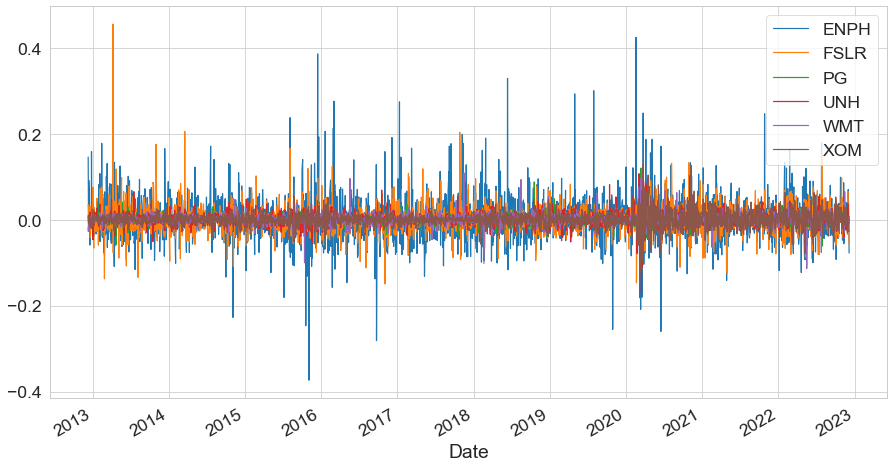

In [55]:
returns_norm.plot(figsize=(15,8));

The above plot confirms volatility observed in ENPH, FSLR.

#### 6.2 Portfolio Risk (computed manually)

In [56]:
#Equal Weights
weights1 = np.array([0.1667,0.1667,0.1667,0.1667,0.1667,0.1667])

In [57]:
returns = np.log(df_adjclose/df_adjclose.shift(1))
returns

ENPH    FSLR      PG     UNH     WMT     XOM
Date                                                      
2012-12-07     nan     nan     nan     nan     nan     nan
2012-12-10     nan     nan     nan     nan     nan     nan
2012-12-11  0.1360  0.0344  0.0062  0.0105 -0.0176  0.0065
2012-12-12  0.0404  0.0292  0.0014  0.0089 -0.0279  0.0052
2012-12-13 -0.0268 -0.0072 -0.0089 -0.0159  0.0014 -0.0098
...            ...     ...     ...     ...     ...     ...
2022-11-30  0.0551  0.0641  0.0250  0.0367 -0.0036  0.0072
2022-12-01 -0.0208 -0.0234  0.0006 -0.0200  0.0062 -0.0049
2022-12-02  0.0677 -0.0013  0.0091 -0.0014 -0.0010 -0.0085
2022-12-05 -0.0005 -0.0070 -0.0101 -0.0021 -0.0103 -0.0278
2022-12-06 -0.0809 -0.0596  0.0013  0.0080 -0.0117 -0.0282

[2517 rows x 6 columns]

In [58]:
#Calculating annualized Standard deviation for equal weights
portfolio_v1 = (np.dot(weights1.T,np.dot(returns.cov()*250,weights1))) ** 0.5
portfolio_v1

0.23712257344949617

In [59]:
#less weightage on highly volatile stocks
weights2 = np.array([0.10,0.10,0.20,0.20,0.20,0.20])

In [60]:
#Calculating annualized Standard deviation for adjusted weights
portfolio_v2 = (np.dot(weights2.T,np.dot(returns.cov()*250,weights2))) ** 0.5
portfolio_v2

0.1916237331341813

In [61]:
weights3 = np.array([0.02,0.02,0.24,0.24,0.24,0.24])

In [62]:
#Calculating annualized Standard deviation for adjusted weights
portfolio_v3 = (np.dot(weights3.T,np.dot(returns.cov()*250,weights3))) ** 0.5
portfolio_v3

0.16297864640644652

---

#### 6.4 Portfolio Optimization with FinQuant

##### Original Portfolio

In [63]:
final_tickers

['PG', 'FSLR', 'ENPH', 'XOM', 'UNH', 'WMT']

In [101]:
#building a portfolio on FinQuant
start_date = '2012-12-01'
end_date = '2022-11-30'
pf = build_portfolio(names=final_tickers,
                     data_api='yfinance',
                    start_date=start_date,
                    end_date=end_date);

[*********************100%***********************]  6 of 6 completed


In [102]:
pf.properties()

----------------------------------------------------------------------
Stocks: PG, FSLR, ENPH, XOM, UNH, WMT
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.285
Portfolio Volatility: 0.238
Portfolio Sharpe Ratio: 1.175

Skewness:
      PG   FSLR   ENPH    XOM    UNH    WMT
0 0.7247 1.4523 1.6968 0.5715 0.7752 0.5597

Kurtosis:
       PG   FSLR   ENPH    XOM     UNH     WMT
0 -0.9446 3.2034 1.7286 3.2610 -0.3861 -1.2167

Information:
   Allocation  Name
0      0.1667    PG
1      0.1667  FSLR
2      0.1667  ENPH
3      0.1667   XOM
4      0.1667   UNH
5      0.1667   WMT
----------------------------------------------------------------------


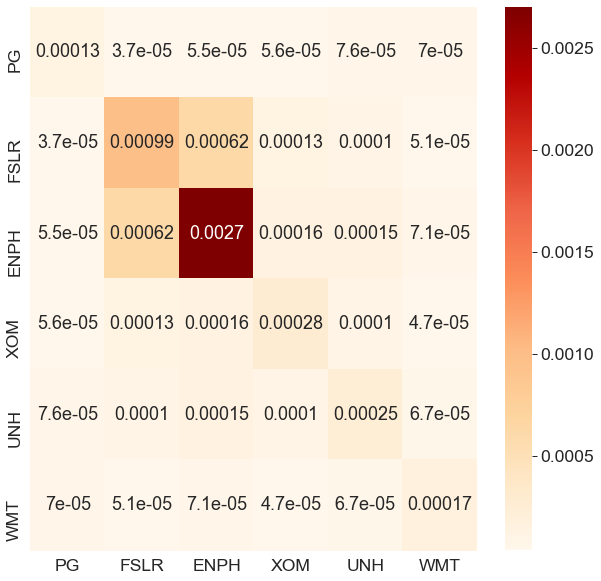

In [103]:
#covariance heatmap
plt.figure(figsize=(10,10))
sns.heatmap(pf.comp_cov(),annot = True, annot_kws={"fontsize":18}, cmap='OrRd',fmt='.2g');

In [104]:
pf.comp_volatility()

0.23844378041081074

In [105]:
pf.comp_expected_return() #with equal weightage

0.2852136467745982

In [106]:
#computing the sharpe ratio of the portfolio
pf.comp_sharpe()

1.1751770010181137

In [107]:
#defining a function to plot the efficient frontier
def PlotEF(portfolio, mc_runs = 5000): 
    # performs and plots results of Monte Carlo run (5000 iterations)
    opt_w, opt_res = portfolio.mc_optimisation(num_trials=mc_runs)

    plt.subplots(figsize = (15,10))

    # plots the results of the Monte Carlo optimisation
    portfolio.mc_plot_results()
    # plots the Efficient Frontier
    portfolio.ef_plot_efrontier()
    # plots optimal portfolios based on Efficient Frontier
    portfolio.ef.plot_optimal_portfolios()
    # plots individual plots of the portfolio
    portfolio.plot_stocks()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



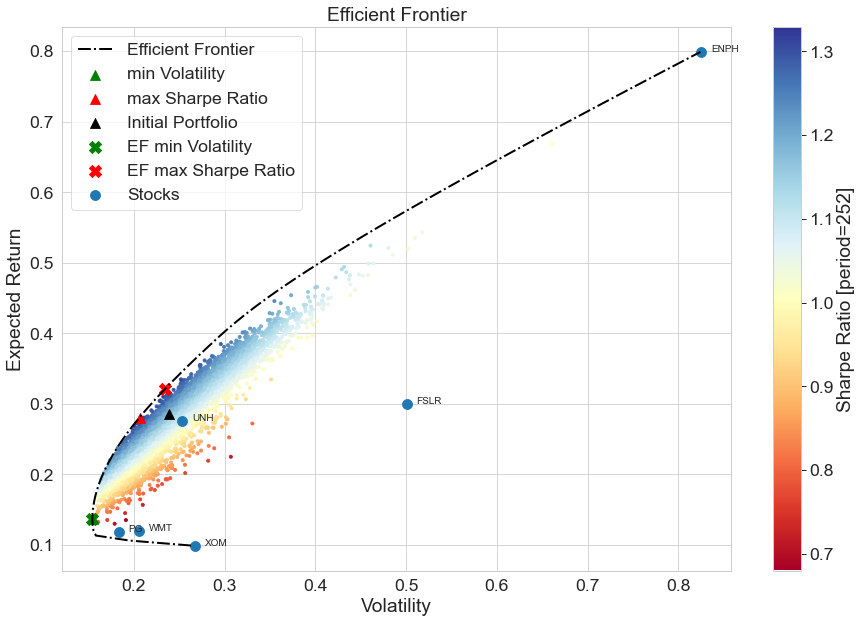

In [108]:
PlotEF(pf)

In [109]:
pf.ef_maximum_sharpe_ratio(verbose=True);

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.320
Annual Volatility: 0.234
Sharpe Ratio: 1.348

Optimal weights:
               PG   FSLR   ENPH    XOM    UNH    WMT
Allocation 0.1346 0.0383 0.1575 0.0000 0.5574 0.1123
----------------------------------------------------------------------


In [110]:
pf.ef_minimum_volatility(verbose=True);

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.136
Annual Volatility: 0.154
Sharpe Ratio: 0.850

Optimal weights:
               PG   FSLR   ENPH    XOM    UNH    WMT
Allocation 0.4292 0.0340 0.0000 0.1503 0.0911 0.2954
----------------------------------------------------------------------


##### Portfolio Optimized to Max Sharpe
(Excludes FSLR)

In [111]:
tickers_maxsharpe = final_tickers.copy()

In [112]:
tickers_maxsharpe.remove('FSLR')
tickers_maxsharpe

['PG', 'ENPH', 'XOM', 'UNH', 'WMT']

In [113]:
pf_maxsharpe = build_portfolio(names=tickers_maxsharpe,
                     data_api='yfinance',
                    start_date=start_date,
                    end_date=end_date);

[*********************100%***********************]  5 of 5 completed


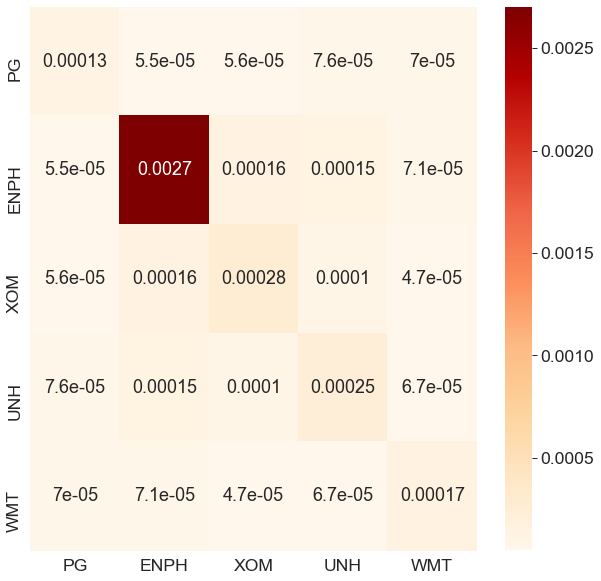

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(pf_maxsharpe.comp_cov(),annot = True, annot_kws={"fontsize":18}, cmap='OrRd',fmt='.2g');

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



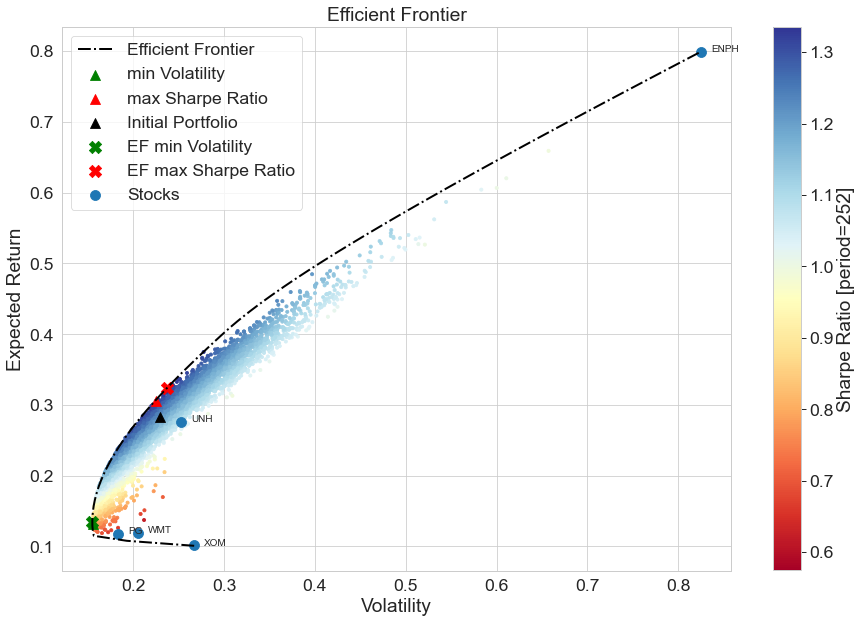

In [115]:
PlotEF(pf_maxsharpe)

In [116]:
df_maxsharpe = pf_maxsharpe.ef_maximum_sharpe_ratio(verbose=True);

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.324
Annual Volatility: 0.237
Sharpe Ratio: 1.344

Optimal weights:
               PG   ENPH    XOM    UNH    WMT
Allocation 0.1343 0.1688 0.0000 0.5766 0.1203
----------------------------------------------------------------------


In [117]:
#df_maxsharpe['Price'] = [149.09, 335.82,106.85,535.04,151.65] # as of Dec 5
for i in df_maxsharpe.index.values.tolist():
    df_maxsharpe.at[i,'Price'] = df_stockinfo.loc[i]['currentPrice']

In [118]:
df_maxsharpe.head(2)

Allocation    Price
PG        0.1343 149.2800
ENPH      0.1688 309.7300

In [119]:
df_maxsharpe['Qty to Buy'] = (100000*df_maxsharpe['Allocation'])/df_maxsharpe['Price']

In [120]:
df_maxsharpe

Allocation    Price  Qty to Buy
PG        0.1343 149.2800     89.9801
ENPH      0.1688 309.7300     54.4910
XOM       0.0000 103.8800      0.0000
UNH       0.5766 539.3200    106.9115
WMT       0.1203 149.8900     80.2639

##### Portfolio Optimized to Min Volatility
(Excludes ENPH)

In [121]:
tickers_minvolatility = final_tickers.copy()

In [122]:
tickers_minvolatility.remove('ENPH')
tickers_minvolatility

['PG', 'FSLR', 'XOM', 'UNH', 'WMT']

In [123]:
pf_minvolatility = build_portfolio(names=tickers_minvolatility,
                     data_api='yfinance',
                    start_date=start_date,
                    end_date=end_date);

[*********************100%***********************]  5 of 5 completed


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



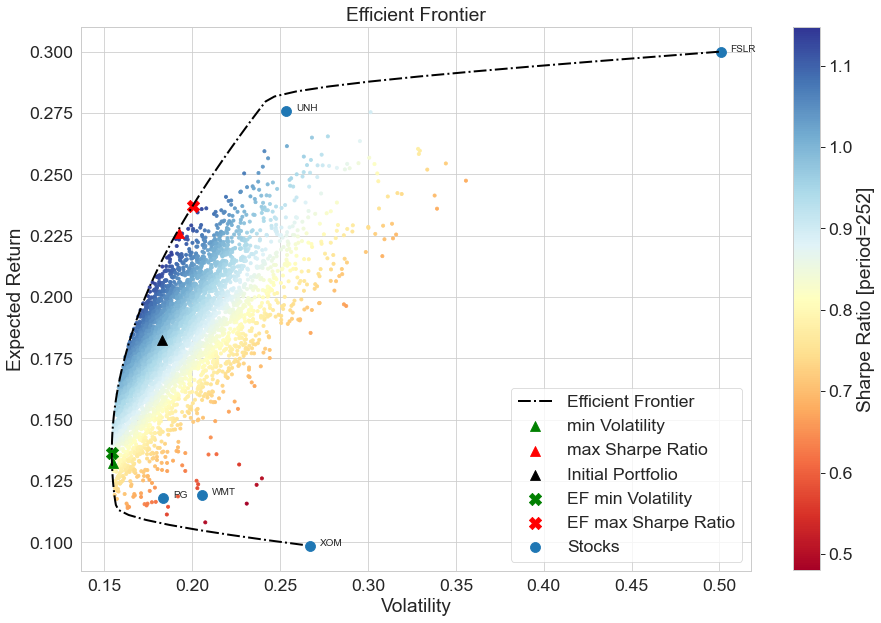

In [124]:
PlotEF(pf_minvolatility)

In [125]:
df_minvol = pf_minvolatility.ef_maximum_sharpe_ratio(verbose=True);

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.237
Annual Volatility: 0.200
Sharpe Ratio: 1.159

Optimal weights:
               PG   FSLR    XOM    UNH    WMT
Allocation 0.1355 0.1306 0.0000 0.6037 0.1303
----------------------------------------------------------------------


In [126]:
#df_minvol['Price'] = [149.09, 167.14,106.85,535.04,151.65] # as of Dec 5
for i in df_minvol.index.values.tolist():
    df_minvol.at[i,'Price'] = df_stockinfo.loc[i]['currentPrice']

In [127]:
df_minvol.head(2)

Allocation    Price
PG        0.1355 149.2800
FSLR      0.1306 157.4700

In [128]:
df_minvol['Qty to Buy'] = (100000*df_minvol['Allocation'])/df_minvol['Price']

In [129]:
df_minvol

Allocation    Price  Qty to Buy
PG        0.1355 149.2800     90.7408
FSLR      0.1306 157.4700     82.9230
XOM       0.0000 103.8800      0.0000
UNH       0.6037 539.3200    111.9346
WMT       0.1303 149.8900     86.9155

---

### 7. Monte Carlo Simulation

#### Defining Functions to Aid Simulation

In [130]:
def RunMonteCarlo(data, ticker_name = "", trials = 1000, days = 250):
        
    #compute logarithmic returns of stock
    log_returns = np.log(1 + data.pct_change())
    
    #compute the drift
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5*var)
    
    #compute variance and daily returns
    stdev = log_returns.std()
    d = days
    n = trials
    Z = stats.norm.ppf(np.random.rand(d,n)) #days, trials
    
    daily_returns = np.exp(drift + stdev * Z)
    
    #Calculating stock price for every trial
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = data.iloc[-1]
    for t in range(1,days):
        price_paths[t] = price_paths[t-1]*daily_returns[t]

    #Plotting price paths on a graph
    plt.figure(figsize=(10,6))
    plt.plot(price_paths)
    if ticker_name != "":
        plt.title(f"Monte Carlo Simulation for {ticker_name} for a period of {days} days using {trials} trials")
    else:
        plt.title(f"Monte Carlo Simulation for a period of {days} days using {trials} trials")
    plt.xlabel("Days")
    plt.ylabel("Price")
    
    return price_paths

In [131]:
def MCAvePredict(mc_pricepaths, ticker_name = ""):
    
    ave_pricepath = np.average(mc_pricepaths, axis=1)
    
    plt.figure(figsize=(10,6))
    plt.plot(ave_pricepath)
    if ticker_name != "":
        plt.title(f"Monte Carlo Prediction for {ticker_name} for a period of {len(ave_pricepath)} days using {len(mc_pricepaths[0])} trials")
    else:
        plt.title(f"Monte Carlo Prediction for a period of {len(ave_pricepath)} days using {len(mc_pricepaths[0])} trials")
    plt.xlabel("Days")
    plt.ylabel("Price")
    
    return ave_pricepath

In [132]:
def MCStats(mc_pricepaths,ticker_name = "", goal = 0.05, bust = -0.05):
    #Get Initial Price
    initial_price = mc_pricepaths[0][0]
    
    #Create np array of Ending Prices
    ending_prices = []
    last_day = len(mc_pricepaths)
    trials = len(mc_pricepaths[0])
    for i in range(0, trials):
        ending_prices.append(mc_pricepaths[last_day-1][i])
    np_endprice = np.array(ending_prices)
        
    #Create np array of Percentage Returns
    np_pctreturns = (np_endprice - initial_price) / initial_price
        
    #Get Key Statistics (Returns Average, Minimumm, Maximum, Probability of Hitting Goal, Probablity of going bust)
    ave_return = np_pctreturns.mean()
    min_return = np_pctreturns.min()
    max_return = np_pctreturns.max()
    prob_goal = np.sum(np_pctreturns >= goal)/trials
    prob_bust = np.sum(np_pctreturns <= bust)/trials
    
    print(f'''{ticker_name}\n
Average Return: {round(ave_return*100,2)}%
Max Return: {round(max_return*100,2)}%
Min Return: {round(min_return*100,2)}%
Probability of Attaining Goal of {round(goal*100,2)}% Returns: {round(prob_goal*100,2)}%
Probability of Going Bust at {round(bust*100,2)}% Loss: {round(prob_bust*100,2)}%'''
             )
    
    return ave_return,min_return,max_return,prob_goal,prob_bust

#### Applying Functions to All Stocks

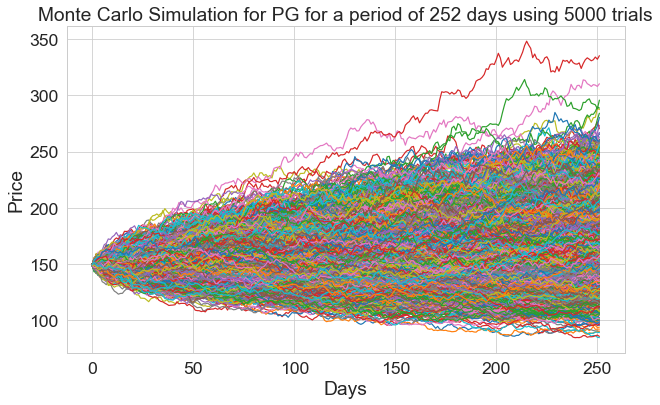

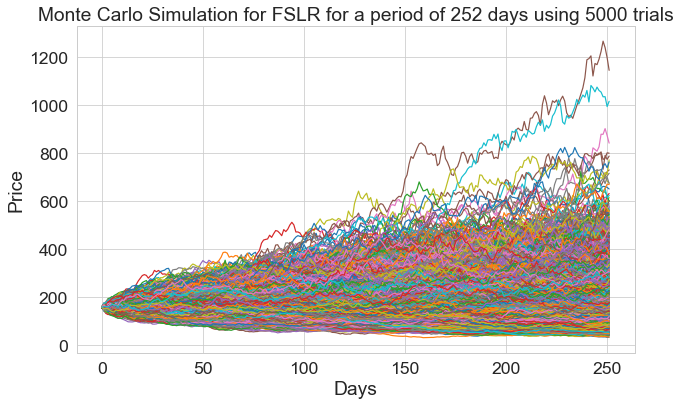

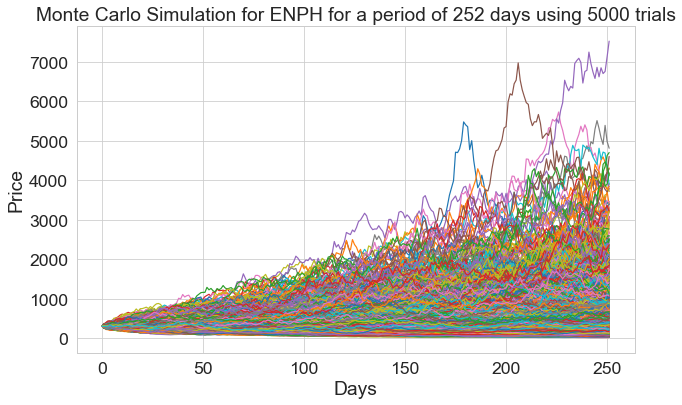

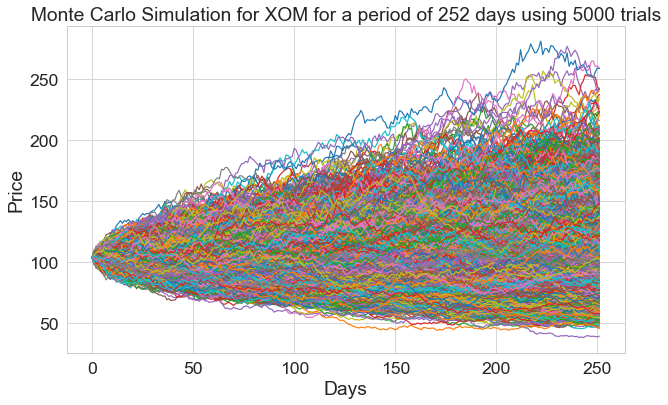

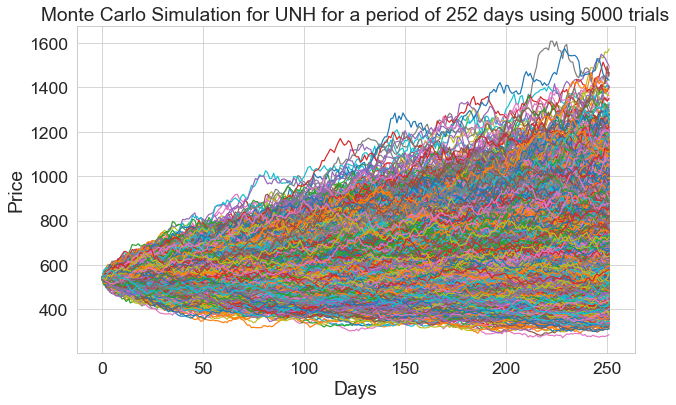

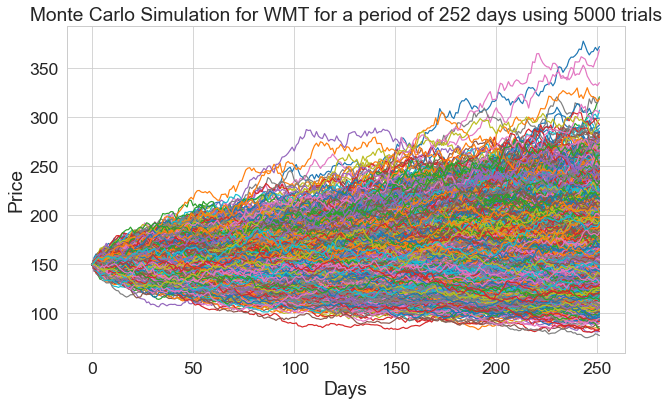

In [133]:
#Looping through Each Stock and creating a dictionary of price paths
d_mcpricepaths = {}
for item in final_tickers:
    d_mcpricepaths[item] = RunMonteCarlo(df_adjclose[item],item, trials=5000,days =252);

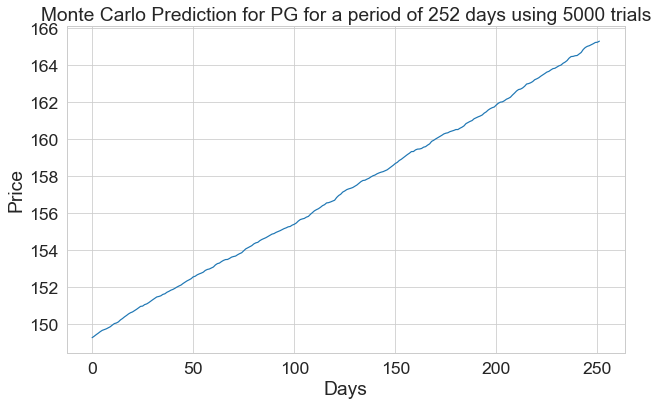

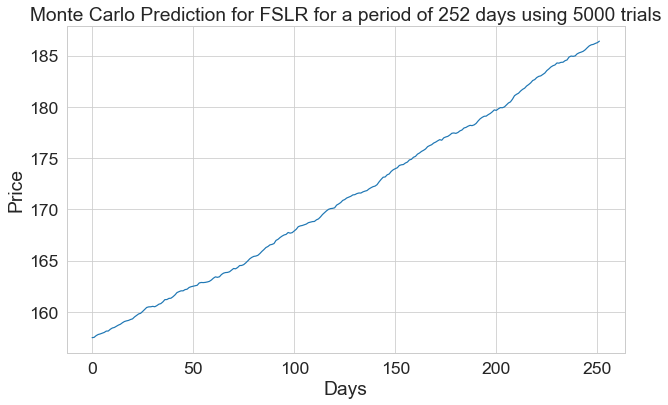

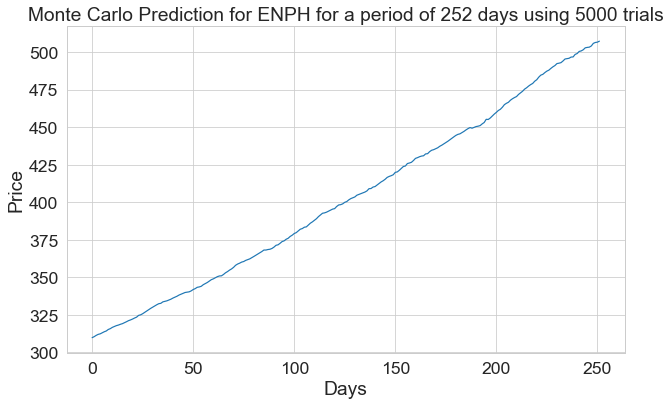

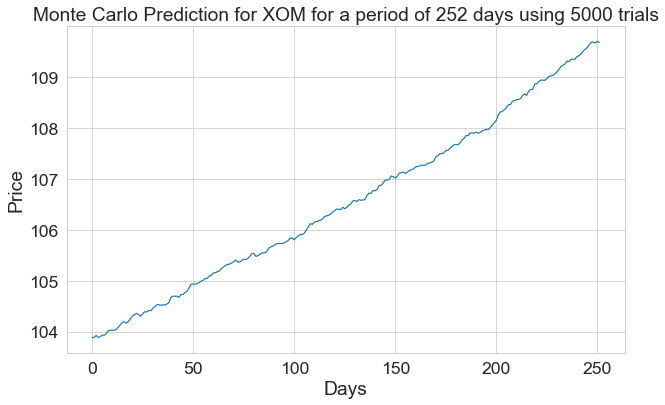

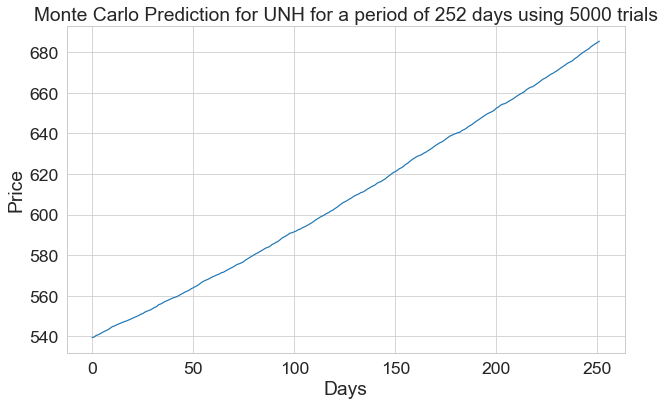

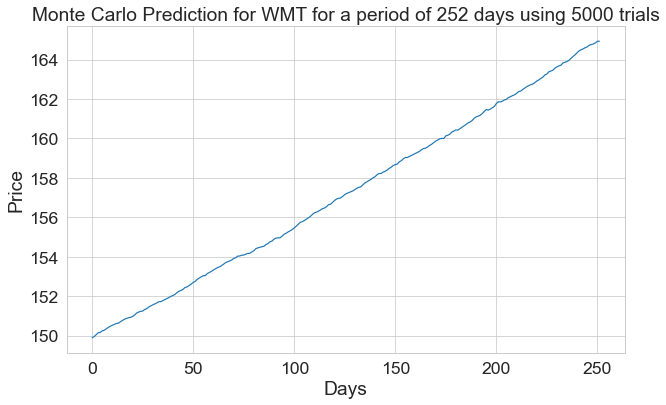

In [134]:
for key in d_mcpricepaths:
    MCAvePredict(d_mcpricepaths[key],key)

In [135]:
#looping through dictionary to get statistics
for key in d_mcpricepaths:
    MCStats(d_mcpricepaths[key],ticker_name = key, goal = 0.08)
    print('\n');

PG

Average Return: 10.73%
Max Return: 124.63%
Min Return: -43.34%
Probability of Attaining Goal of 8.0% Returns: 51.98%
Probability of Going Bust at -5.0% Loss: 22.76%


FSLR

Average Return: 18.37%
Max Return: 627.51%
Min Return: -79.34%
Probability of Attaining Goal of 8.0% Returns: 48.3%
Probability of Going Bust at -5.0% Loss: 42.46%


ENPH

Average Return: 63.79%
Max Return: 2329.46%
Min Return: -93.34%
Probability of Attaining Goal of 8.0% Returns: 53.74%
Probability of Going Bust at -5.0% Loss: 39.74%


XOM

Average Return: 5.59%
Max Return: 149.33%
Min Return: -62.05%
Probability of Attaining Goal of 8.0% Returns: 41.74%
Probability of Going Bust at -5.0% Loss: 40.56%


UNH

Average Return: 27.1%
Max Return: 191.69%
Min Return: -46.98%
Probability of Attaining Goal of 8.0% Returns: 69.4%
Probability of Going Bust at -5.0% Loss: 15.02%


WMT

Average Return: 10.03%
Max Return: 147.96%
Min Return: -48.39%
Probability of Attaining Goal of 8.0% Returns: 49.3%
Probability of Going 

---

### 8. Conclusion

Select Portfolio Maximing Sharpe Ratio, excluding FSLR.

In [136]:
pf_maxsharpe.ef_maximum_sharpe_ratio(verbose=True);

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.324
Annual Volatility: 0.237
Sharpe Ratio: 1.344

Optimal weights:
               PG   ENPH    XOM    UNH    WMT
Allocation 0.1343 0.1688 0.0000 0.5766 0.1203
----------------------------------------------------------------------


In [137]:
df_maxsharpe

Allocation    Price  Qty to Buy
PG        0.1343 149.2800     89.9801
ENPH      0.1688 309.7300     54.4910
XOM       0.0000 103.8800      0.0000
UNH       0.5766 539.3200    106.9115
WMT       0.1203 149.8900     80.2639